# Multidimensional scaling of E-MAP data
 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from collections import Counter

plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# read in r dataframe
# data = pd.read_csv("/Users/annie/emap/20180109/final.csv")
data = pd.read_csv("/Users/annie/emap/20180109/corr_of_corr_no_na_no_mut_sep_no_na.csv")

Look at the dataframe we've read in.

In [3]:
data.head()

,method,value,mutant,partner,protein,ORF,cluster_number,cluster
0,corr_of_corr_no_na_no_mut,-0.441411,K129F,CIN1 - YOR349W,CIN1,YOR349W,10,Golgi and ER_GO_2
1,corr_of_corr_no_na_no_mut,-0.246723,K129I,CIN1 - YOR349W,CIN1,YOR349W,10,Golgi and ER_GO_2
2,corr_of_corr_no_na_no_mut,-0.374419,K129T,CIN1 - YOR349W,CIN1,YOR349W,10,Golgi and ER_GO_2
3,corr_of_corr_no_na_no_mut,-0.449169,K132H,CIN1 - YOR349W,CIN1,YOR349W,10,Golgi and ER_GO_2
4,corr_of_corr_no_na_no_mut,0.375386,K143H,CIN1 - YOR349W,CIN1,YOR349W,10,Golgi and ER_GO_2


In [4]:
#data = data[data['cluster'] == 'Golgi and ER_GO_2']
#data = data[data['cluster'] == 'chromatin_GO_1']
data = data[data['cluster'] == 'mitochondrion_GO_3']

In [5]:
data.shape

(32273, 8)

In [6]:
data['protein_cluster'] = data.protein + "-" + data.cluster

In [7]:
data.columns

Index(['method', 'value', 'mutant', 'partner', 'protein', 'ORF',
       'cluster_number', 'cluster', 'protein_cluster'],
      dtype='object')

Now create correlation of correlations matrix for entire set of proteins. In matrix, the index denotes the correlation of correlation for a given mutant-cluster and the column labels denote the protein. 

In [8]:
# create dictionary with list of protein_cluster for each mutant
mutants = pd.unique(data.mutant).tolist()
i = 0
f = [None] * len(mutants)
for mutant in mutants:
    data_mutant = data[data.mutant == mutant]
    f[i] = data_mutant.protein_cluster
    i = i+1
d = dict(zip(mutants, f))

In [9]:
# protein_cluster is a list of all protein_cluster
protein_cluster = pd.unique(data.protein_cluster).tolist()

# initialize empty dataframe with rownames as the unique protein_cluster
cmat = pd.DataFrame([], index = protein_cluster)

# need a counter for column names
i = 0

# loop through the mutants
for mutant, c in d.items():
    df_mutant = data[data.mutant == mutant]
    #create column of data frame
    column = []
    for pc in protein_cluster:
        v = df_mutant[df_mutant.protein_cluster == pc].value
        #if v.empty:
            #column.append(0)
        #else:
        column.append(v.values[0])
    #create index name
    index = str(i)
    #add column
    cmat[index] = column
    #update index
    i = i + 1

cmat[10:20]

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
COG7-mitochondrion_GO_3,-0.178334,-0.314128,-0.221575,0.024393,0.257928,0.279482,0.167716,0.131096,0.117598,-0.157725,...,0.024023,-0.154959,-0.221241,0.476456,0.222147,-0.015166,0.578563,-0.035802,-0.114841,-0.407181
NUP120-mitochondrion_GO_3,-0.448138,-0.288995,-0.579912,-0.287869,-0.346135,-0.219116,-0.263892,-0.175826,-0.498985,-0.259522,...,-0.462453,-0.024681,-0.519404,0.426413,0.401101,0.502559,0.025457,0.386974,-0.422456,-0.480177
KIP3-mitochondrion_GO_3,-0.221702,0.057441,0.243848,-0.404671,-0.081391,0.366569,0.004619,0.307865,0.227273,-0.004394,...,-0.003534,-0.140942,0.017610,0.125361,-0.283094,-0.287760,0.526675,-0.044494,-0.139305,-0.136860
INP52-mitochondrion_GO_3,0.288848,-0.032483,0.192153,0.035079,0.130914,0.041462,0.278596,-0.143483,-0.026372,0.042207,...,-0.066973,0.375405,0.280057,-0.127746,0.138317,0.015260,0.004105,-0.184642,0.156405,0.320017
TMA23-mitochondrion_GO_3,-0.059797,-0.169474,-0.253136,0.230413,0.166283,-0.091750,0.387820,0.073031,0.070226,-0.440203,...,0.331681,-0.310612,0.151383,0.396691,0.422485,0.379738,0.207954,-0.351246,-0.027654,-0.287556
SET2-mitochondrion_GO_3,0.195759,-0.158201,-0.107445,0.241787,0.434583,0.040294,0.541292,-0.157699,0.179212,-0.219510,...,0.289125,-0.061511,0.289642,0.418726,0.420238,0.195905,0.410629,-0.407212,0.218298,-0.086013
ARL1-mitochondrion_GO_3,0.031081,-0.189943,0.109284,0.061940,0.172967,-0.172150,-0.011067,-0.337533,-0.194314,-0.189380,...,0.223666,0.226166,0.027083,0.144972,0.161069,0.102033,-0.149899,-0.055226,0.173063,0.035951
DPB4-mitochondrion_GO_3,-0.728019,-0.229231,-0.191605,-0.484051,-0.270810,0.165295,-0.430057,0.505033,-0.118621,-0.281805,...,-0.189921,-0.472606,-0.619344,0.534386,-0.156730,0.036029,0.339577,0.171643,-0.562338,-0.585601
SPT8-mitochondrion_GO_3,-0.145717,-0.317180,-0.197493,0.020857,0.405019,0.265975,0.308229,0.085025,0.171989,-0.413886,...,0.284388,-0.233850,-0.057464,0.727899,0.211813,0.173785,0.370073,-0.391330,-0.116353,-0.384733
LEO1-mitochondrion_GO_3,-0.431946,-0.624695,-0.178409,-0.296573,0.022257,-0.079396,-0.117121,0.169483,-0.029635,-0.601441,...,0.127895,-0.192346,-0.401392,0.719098,0.003809,0.202222,0.328281,-0.255436,-0.347990,-0.506686


In [10]:
len(mutants)

59

In [11]:
cmat.shape

(525, 59)

### Distance between protein interaction profiles

In [12]:
from sklearn.manifold import MDS
from scipy.spatial import distance

Plotting infrastructure setup

In [13]:
def simple_scatterplot(x,y,title,labels,savepath):
    # Scatterplot with a title and labels
    fig, ax = plt.subplots(figsize=(16,14))
    ax.scatter(x, y, marker='o')
    plt.title(title, fontsize=14)
    for i, label in enumerate(labels):
        ax.annotate(label, (x[i],y[i]))
    #save file
    if (savepath != None):
        plt.savefig(savepath)
    return ax

In [14]:
def fit_MDS_2D(distances):
    # A simple MDS embedding plot:
    mds = MDS(n_components=2, dissimilarity='precomputed',random_state=123)
    #fit based on computed Euclidean distances
    mds_fit = mds.fit(distances)
    #get 2D Euclidean points of presidents
    points = mds_fit.embedding_
    return points

In [15]:
#norm=cmat.fillna(0)
norm=cmat

Make a numpy array version of the dataframe to use with Scikit-Learn:

In [16]:
norm = np.array(norm)
norm.shape

(525, 59)

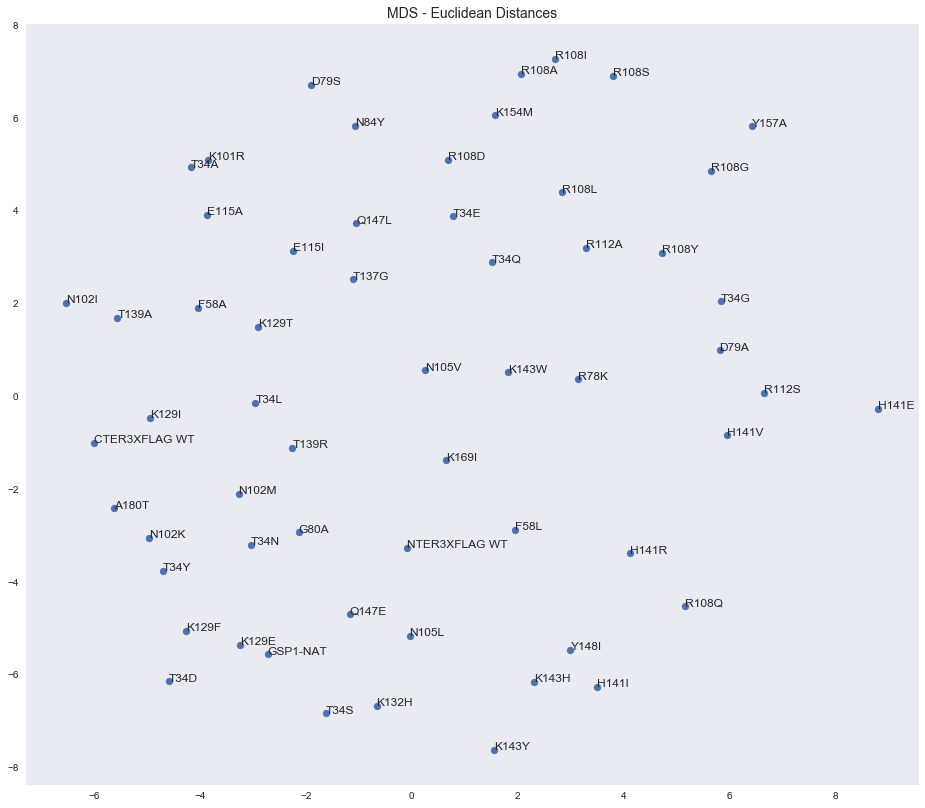

In [17]:
#Intialize empty matrix of Euclidean distances
euc_dists = np.zeros(shape = (norm.shape[1], norm.shape[1]))
#loop through columns
for i in range(norm.shape[1]):
    #catch first column to compare
    cur_col = norm[:, i]
    #loop through remaining columns
    for j in range(i, norm.shape[1], 1):
        #catch second column to compare
        comp_col = norm[:, j]
        
        #compute Euclidean Distance
        euc_dist = distance.euclidean(cur_col, comp_col)
        euc_dists[i, j] = euc_dist
        
        #the matrices are symmetric, saves runntime to do this
        if (i != j):
            euc_dists[j, i] = euc_dist

# Fit with MDS
points_euclidean = fit_MDS_2D(euc_dists)

# Create scatter plot of projected points based on Euclidean Distances
simple_scatterplot(points_euclidean[:,0],points_euclidean[:,1],
                   "MDS - Euclidean Distances",
                   mutants,
                   'results/mds_1_mut.png'
                  );

In [18]:
def plot_embedding(data, title='MDS Embedding', savepath=None, palette='viridis', 
                   size=7):
    """Plot an MDS embedding dataframe for all presidents.
    
    Uses Seaborn's `lmplot` to create an x-y scatterplot of the data, encoding the 
    value of the investor field into the hue (which can be mapped to any desired
    color palette).
    
    Parameters
    ----------
    data : DataFrame
        A DataFrame that must contain 3 columns labeled 'x', 'y' and 'protein'.
        
    title : optional, string
        Title for the plot
        
    savepath : optional, string
        If given, a path to save the figure into using matplotlib's `savefig`.
        
    palette : optional, string
        The name of a valid Seaborn palette for coloring the points.
    
    size : optional, float
        Size of the plot in inches (single number, square plot)
        
    Returns
    -------
    FacetGrid
        The Seaborn FacetGrid object used to create the plot.
    """
    #process data
    x = data['x']
    y = data['y']
    mutant = data['mutant']
    
    #set boolean for using or not using annotation
    do_annotate = False
    
    #create scatterplot using linear model without a regression fit
    p = sns.lmplot(x = "x", y = "y", data = data, hue = "mutant", palette = palette, size = size, fit_reg= False, legend=False)
    p.ax.legend(bbox_to_anchor=(1.01, 0.85),ncol=2)
    
    #this is used in order to annotate
    ax = plt.gca()
    
    #make grid and set title
    plt.grid()
    plt.title(title,fontsize=16)
    
    #adjust border for file saving so not cut-off
    plt.tight_layout()
    
    #save file
    if (savepath != None):
        plt.savefig(savepath)

In [19]:
#create embed_peu data frame
embed_peu = pd.DataFrame([])
embed_peu['x'] = points_euclidean[:, 0]
embed_peu['y'] = points_euclidean[:, 1]
embed_peu['mutant'] = mutants

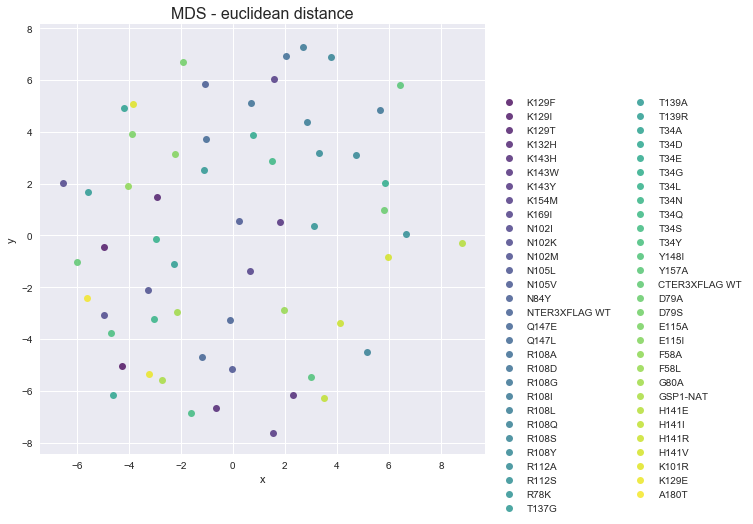

In [20]:
plot_embedding(embed_peu, 'MDS - euclidean distance', 'results/mds_mut.png');